## IMPORT THE PACKAGES


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## READ DATA and CHECK DATA

In [8]:
data = pd.read_csv('AB_NYC_2019.csv')
data_dummy = data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## DROP THE NA VALUES 
(we see varying values exact values that are missing also found below)

In [11]:
data_cleared = data.dropna()

In [13]:
data_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

## EXACT VALUES THAT ARE NULL

In [15]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
data_cleared.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
data_cleared.describe(include=['int64'])

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.332526,5.869220,29.290255,5.166611,114.886299
std,1.069372e+07,7.589752e+07,196.994756,17.389026,48.182900,26.302954,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [30]:
data_cleared[['price', 'availability_365','minimum_nights']].describe()

,price,availability_365,minimum_nights
count,38821.000000,38821.000000,38821.000000
mean,142.332526,114.886299,5.869220
std,196.994756,129.529950,17.389026
min,0.000000,0.000000,1.000000
25%,69.000000,0.000000,1.000000
50%,101.000000,55.000000,2.000000
75%,170.000000,229.000000,4.000000
max,10000.000000,365.000000,1250.000000


In [38]:
data_cleared['neighbourhood'].value_counts()
data_cleared['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Harlem', 'Greenpoint', 'Bushwick', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Flatbush', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

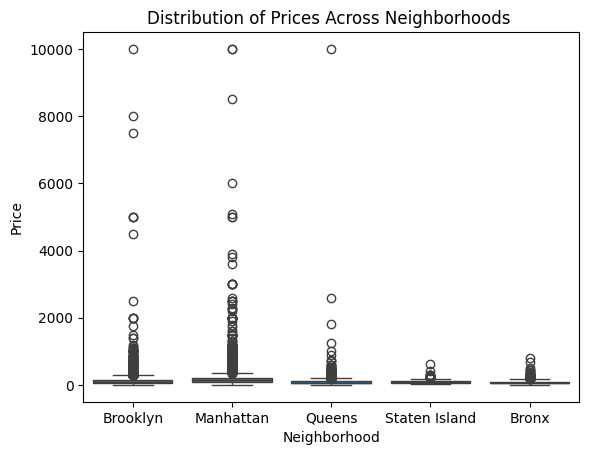

In [52]:
sns.boxplot(data=data_cleared,x='neighbourhood_group', y='price' )
plt.title(f'Distribution of Prices Across Neighborhoods ')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.show()

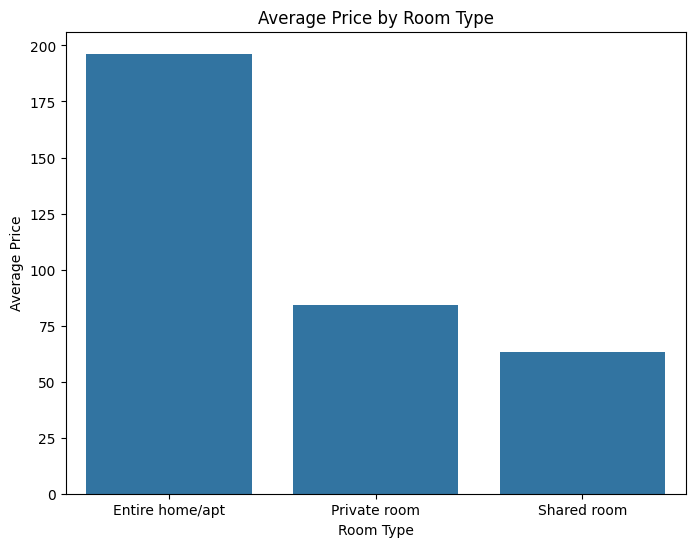

In [54]:
# Group by room type and calculate average price
avg_price_by_room_type = data_cleared.groupby('room_type')['price'].mean().reset_index()

# Bar plot of average price across room types
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


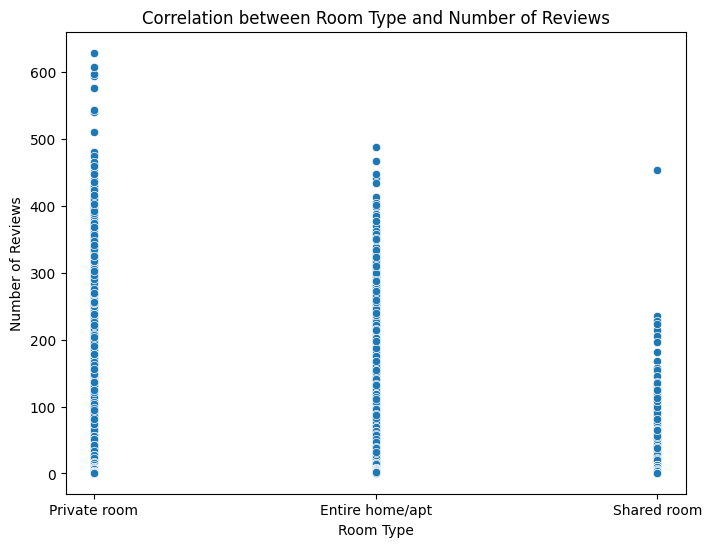

In [56]:
# Scatter plot with room type and number of reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='room_type', y='number_of_reviews', data=data_cleared)
plt.title('Correlation between Room Type and Number of Reviews')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()


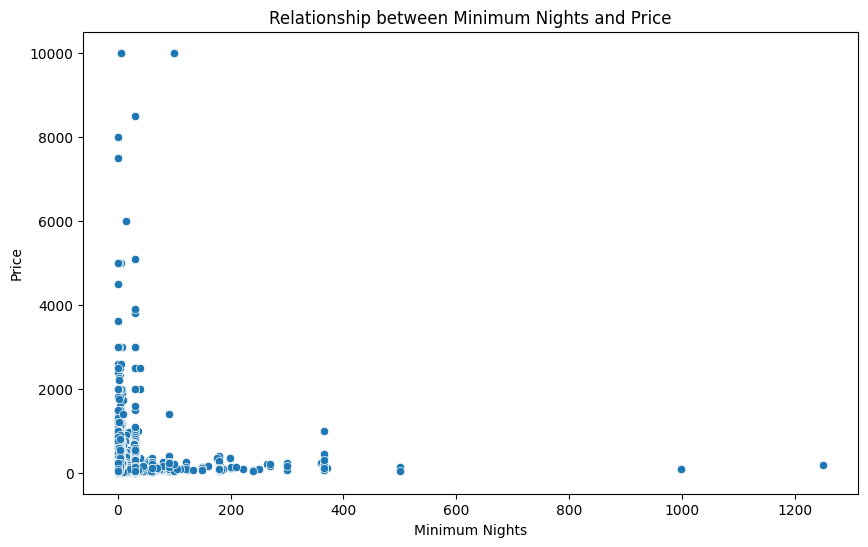

In [58]:
# Scatter plot with minimum nights and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=data_cleared)
plt.title('Relationship between Minimum Nights and Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()
